In [1]:
import warnings
warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import re
from scipy import stats
%matplotlib inline

In [2]:
df = pd.read_csv('marketing_data.csv')

pd.options.display.max_columns = None
df.head()

ID  Year_Birth   Education Marital_Status      Income   Kidhome  \
0   1826        1970  Graduation       Divorced  $84,835.00         0   
1      1        1961  Graduation         Single  $57,091.00         0   
2  10476        1958  Graduation        Married  $67,267.00         0   
3   1386        1967  Graduation       Together  $32,474.00         1   
4   5371        1989  Graduation         Single  $21,474.00         1   

   Teenhome Dt_Customer  Recency  MntWines  MntFruits  MntMeatProducts  \
0         0     6/16/14        0       189        104              379   
1         0     6/15/14        0       464          5               64   
2         1     5/13/14        0       134         11               59   
3         1     5/11/14        0        10          0                1   
4         0      4/8/14        0         6         16               24   

   MntFishProducts  MntSweetProducts  MntGoldProds  NumDealsPurchases  \
0              111               189           218                  1   
1                7                 0            37                  1   
2               15                 2            30                  1   
3                0                 0             0                  1   
4               11                 0            34                  2   

   NumWebPurchases  NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  \
0                4                    4                  6                  1   
1                7                    3                  7                  5   
2                3                    2                  5                  2   
3                1                    0                  2                  7   
4                3                    1                  2                  7   

   AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  \
0             0             0             0             0             0   
1             0             0             0             0             1   
2             0             0             0             0             0   
3             0             0             0             0             0   
4             1             0             0             0             0   

   Response  Complain Country  
0         1         0      SP  
1         1         0      CA  
2         0         0      US  
3         0         0     AUS  
4         1         0      SP

In [3]:
class Descriptor:
    """
    Descriptor object that allows you to explore the nature of the features in the Dataframe.
    """
    
    # Create class variables for the descriptor object
    seperator_num = 50
    cat_val = 10
    seperator = '-' * seperator_num
    
    def __init__(self, df):
        '''
        Instance variables
        '''
        self.df = df
        

    def categorical_columns(self):
        '''
        Return the categorical features which are determined to be features which have the number 
        of unique variables EQUAL TO OR LESS THAN the specified class variable "cat_val"
        '''
        return [col for col in self.df.columns if len(self.df[col].unique()) <= self.cat_val]
    
    
    def numerical_columns(self):
        '''
        Return the numerical features which are determined to be features which have the number 
        of unique variables GREATER THAN the specified class variable "cat_val"
        '''
        return [col for col in self.df.columns if len(self.df[col].unique()) > self.cat_val]    
    
        
    def all_features(self):
        '''
        Gain a genereal overview of values within each feature in the dataset
        '''
        # Loop through all features and show info
        for col in self.df.columns:
            print(col + ':')
            print(f'Variable Type: {self.df[col].dtype}')
            print(f'Number of Unique: {len(df[col].unique())}')
            print(f'Number of NaN Values: {round(self.df[col].isna().sum()/len(self.df[col]) * 100, 1)}%')
            print(self.seperator + '\n')
    
    
    def categorical(self):
        '''
        Gain a genereal overview of categorical features in the dataset
        '''
        # Create list of categorical column names
        columns = self.categorical_columns()
        
        # Loop through each categorical column and show info
        for col in columns:
            print(col.upper())
            print(f'Number of Unique: {len(df[col].unique())}')
            print('Unique Values:')
            print(round(self.df[col].value_counts()/len(self.df[col]), 2))
            print(self.seperator + '\n')
            
    def numerical(self):
        '''
        Gain a genereal overview of numerical features in the dataset
        '''
        # Create a list of numerical column names
        columns = self.numerical_columns()
        
        # Loop through each numerical column and show info
        for col in columns:
            print(col.upper())
            if stats.normaltest(self.df[col]).pvalue > 0.05:
                print('Normal Distribution: True')
            else:
                print('Normal Distribution: False')
                
            print(self.df[col].describe())
            print(self.seperator + '\n')
            

    
new = Descriptor(df)

new.all_features()

ID:
Variable Type: int64
Number of Unique: 2240
Number of NaN Values: 0.0%
--------------------------------------------------

Year_Birth:
Variable Type: int64
Number of Unique: 59
Number of NaN Values: 0.0%
--------------------------------------------------

Education:
Variable Type: object
Number of Unique: 5
Number of NaN Values: 0.0%
--------------------------------------------------

Marital_Status:
Variable Type: object
Number of Unique: 8
Number of NaN Values: 0.0%
--------------------------------------------------

 Income :
Variable Type: object
Number of Unique: 1975
Number of NaN Values: 1.1%
--------------------------------------------------

Kidhome:
Variable Type: int64
Number of Unique: 3
Number of NaN Values: 0.0%
--------------------------------------------------

Teenhome:
Variable Type: int64
Number of Unique: 3
Number of NaN Values: 0.0%
--------------------------------------------------

Dt_Customer:
Variable Type: object
Number of Unique: 663
Number of NaN Values:

In [4]:
def get_age(birth_year):
    '''
    Use year of birth to generate customer age relative to current year.
    '''
    now = datetime.datetime.now()
    age = now.year - birth_year 
    return age


def get_customer_months(join_date):
    '''
    Use the date the customer joined to generate the number of months.
    '''
    now = datetime.datetime.now()
    date = pd.to_datetime(join_date)
    months = ((now.year - date.year) * 12) + (now.month - date.month)
    return months


def remove_nan(df, thresh=0.25):
    '''
    Remove NaN values if they are above a certain threshold.
    '''
    feature_drop_list = []
    for col in df.columns:
        current_series = df[col]
        if current_series.isna().sum()/len(current_series) > thresh:
            feature_drop_list.append(col)
        else:
            continue
    df = df.drop(feature_drop_list, axis=1)
    df = df.dropna(axis=0)
    return df


def convert_string_amount(string_ammount):
    '''
    Isolate numerical values in a string and convert to float
    '''
    pattern = re.compile(r'[^\d.]+')
    new_amount = float(pattern.sub('', string_ammount))
    return new_amount


# Applythe above functions
df['age'] = df['Year_Birth'].apply(get_age)
df['month_customer'] = df['Dt_Customer'].apply(get_customer_months)
df = remove_nan(df)
df['income'] = df[' Income '].apply(convert_string_amount)

# Drop unnecessary features
drop_list = ['ID', 'Year_Birth', ' Income ', 'Dt_Customer']
df = df.drop(drop_list, axis=1)
df.head()

Education Marital_Status  Kidhome  Teenhome  Recency  MntWines  MntFruits  \
0  Graduation       Divorced        0         0        0       189        104   
1  Graduation         Single        0         0        0       464          5   
2  Graduation        Married        0         1        0       134         11   
3  Graduation       Together        1         1        0        10          0   
4  Graduation         Single        1         0        0         6         16   

   MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
0              379              111               189           218   
1               64                7                 0            37   
2               59               15                 2            30   
3                1                0                 0             0   
4               24               11                 0            34   

   NumDealsPurchases  NumWebPurchases  NumCatalogPurchases  NumStorePurchases  \
0                  1                4                    4                  6   
1                  1                7                    3                  7   
2                  1                3                    2                  5   
3                  1                1                    0                  2   
4                  2                3                    1                  2   

   NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  \
0                  1             0             0             0             0   
1                  5             0             0             0             0   
2                  2             0             0             0             0   
3                  7             0             0             0             0   
4                  7             1             0             0             0   

   AcceptedCmp2  Response  Complain Country  age  month_customer   income  
0             0         1         0      SP   52              94  84835.0  
1             1         1         0      CA   61              94  57091.0  
2             0         0         0      US   64              95  67267.0  
3             0         0         0     AUS   55              95  32474.0  
4             0         1         0      SP   33              96  21474.0

In [6]:
class Visuals(Descriptor):
    """
    Create a Visuals object to display the visual representation of the data.
    Inherit the Descriptor object.
    """
    
    def __init__(self, df):
        '''
        Create Instance variables
        '''
        self.df = df
        
        
    def categorical(self, target):
        '''
        View the categorical features visuals
        '''
        columns = self.categorical_columns()
        for col in columns:
            fig, ax = plt.subplots(1, 1, figsize=(8,4), dpi=600)
            fig.tight_layout(pad=3)
            graph = pd.crosstab(self.df[col], self.df[target], normalize = 'index')
            graph.plot(ax = ax, kind='bar', stacked=True, title = col.upper() + ' v ' + target, xlabel= '', rot=45)
            ax.legend(bbox_to_anchor=(1.05, 0.6))
            
    def numerical(self, target):
        '''
        View the numerical features visuals
        '''
        columns = self.numerical_columns()
        columns.append(target)
        sns.pairplot(self.df[columns], hue=target, vars= columns, markers=['o','s'])
        
# Create an instance of the Visuals object        
df_vs = Visuals(df)

# Observe Categorical columns
df_vs.categorical(target='Response')

['Education',
 'Marital_Status',
 'Kidhome',
 'Teenhome',
 'AcceptedCmp3',
 'AcceptedCmp4',
 'AcceptedCmp5',
 'AcceptedCmp1',
 'AcceptedCmp2',
 'Response',
 'Complain',
 'Country']

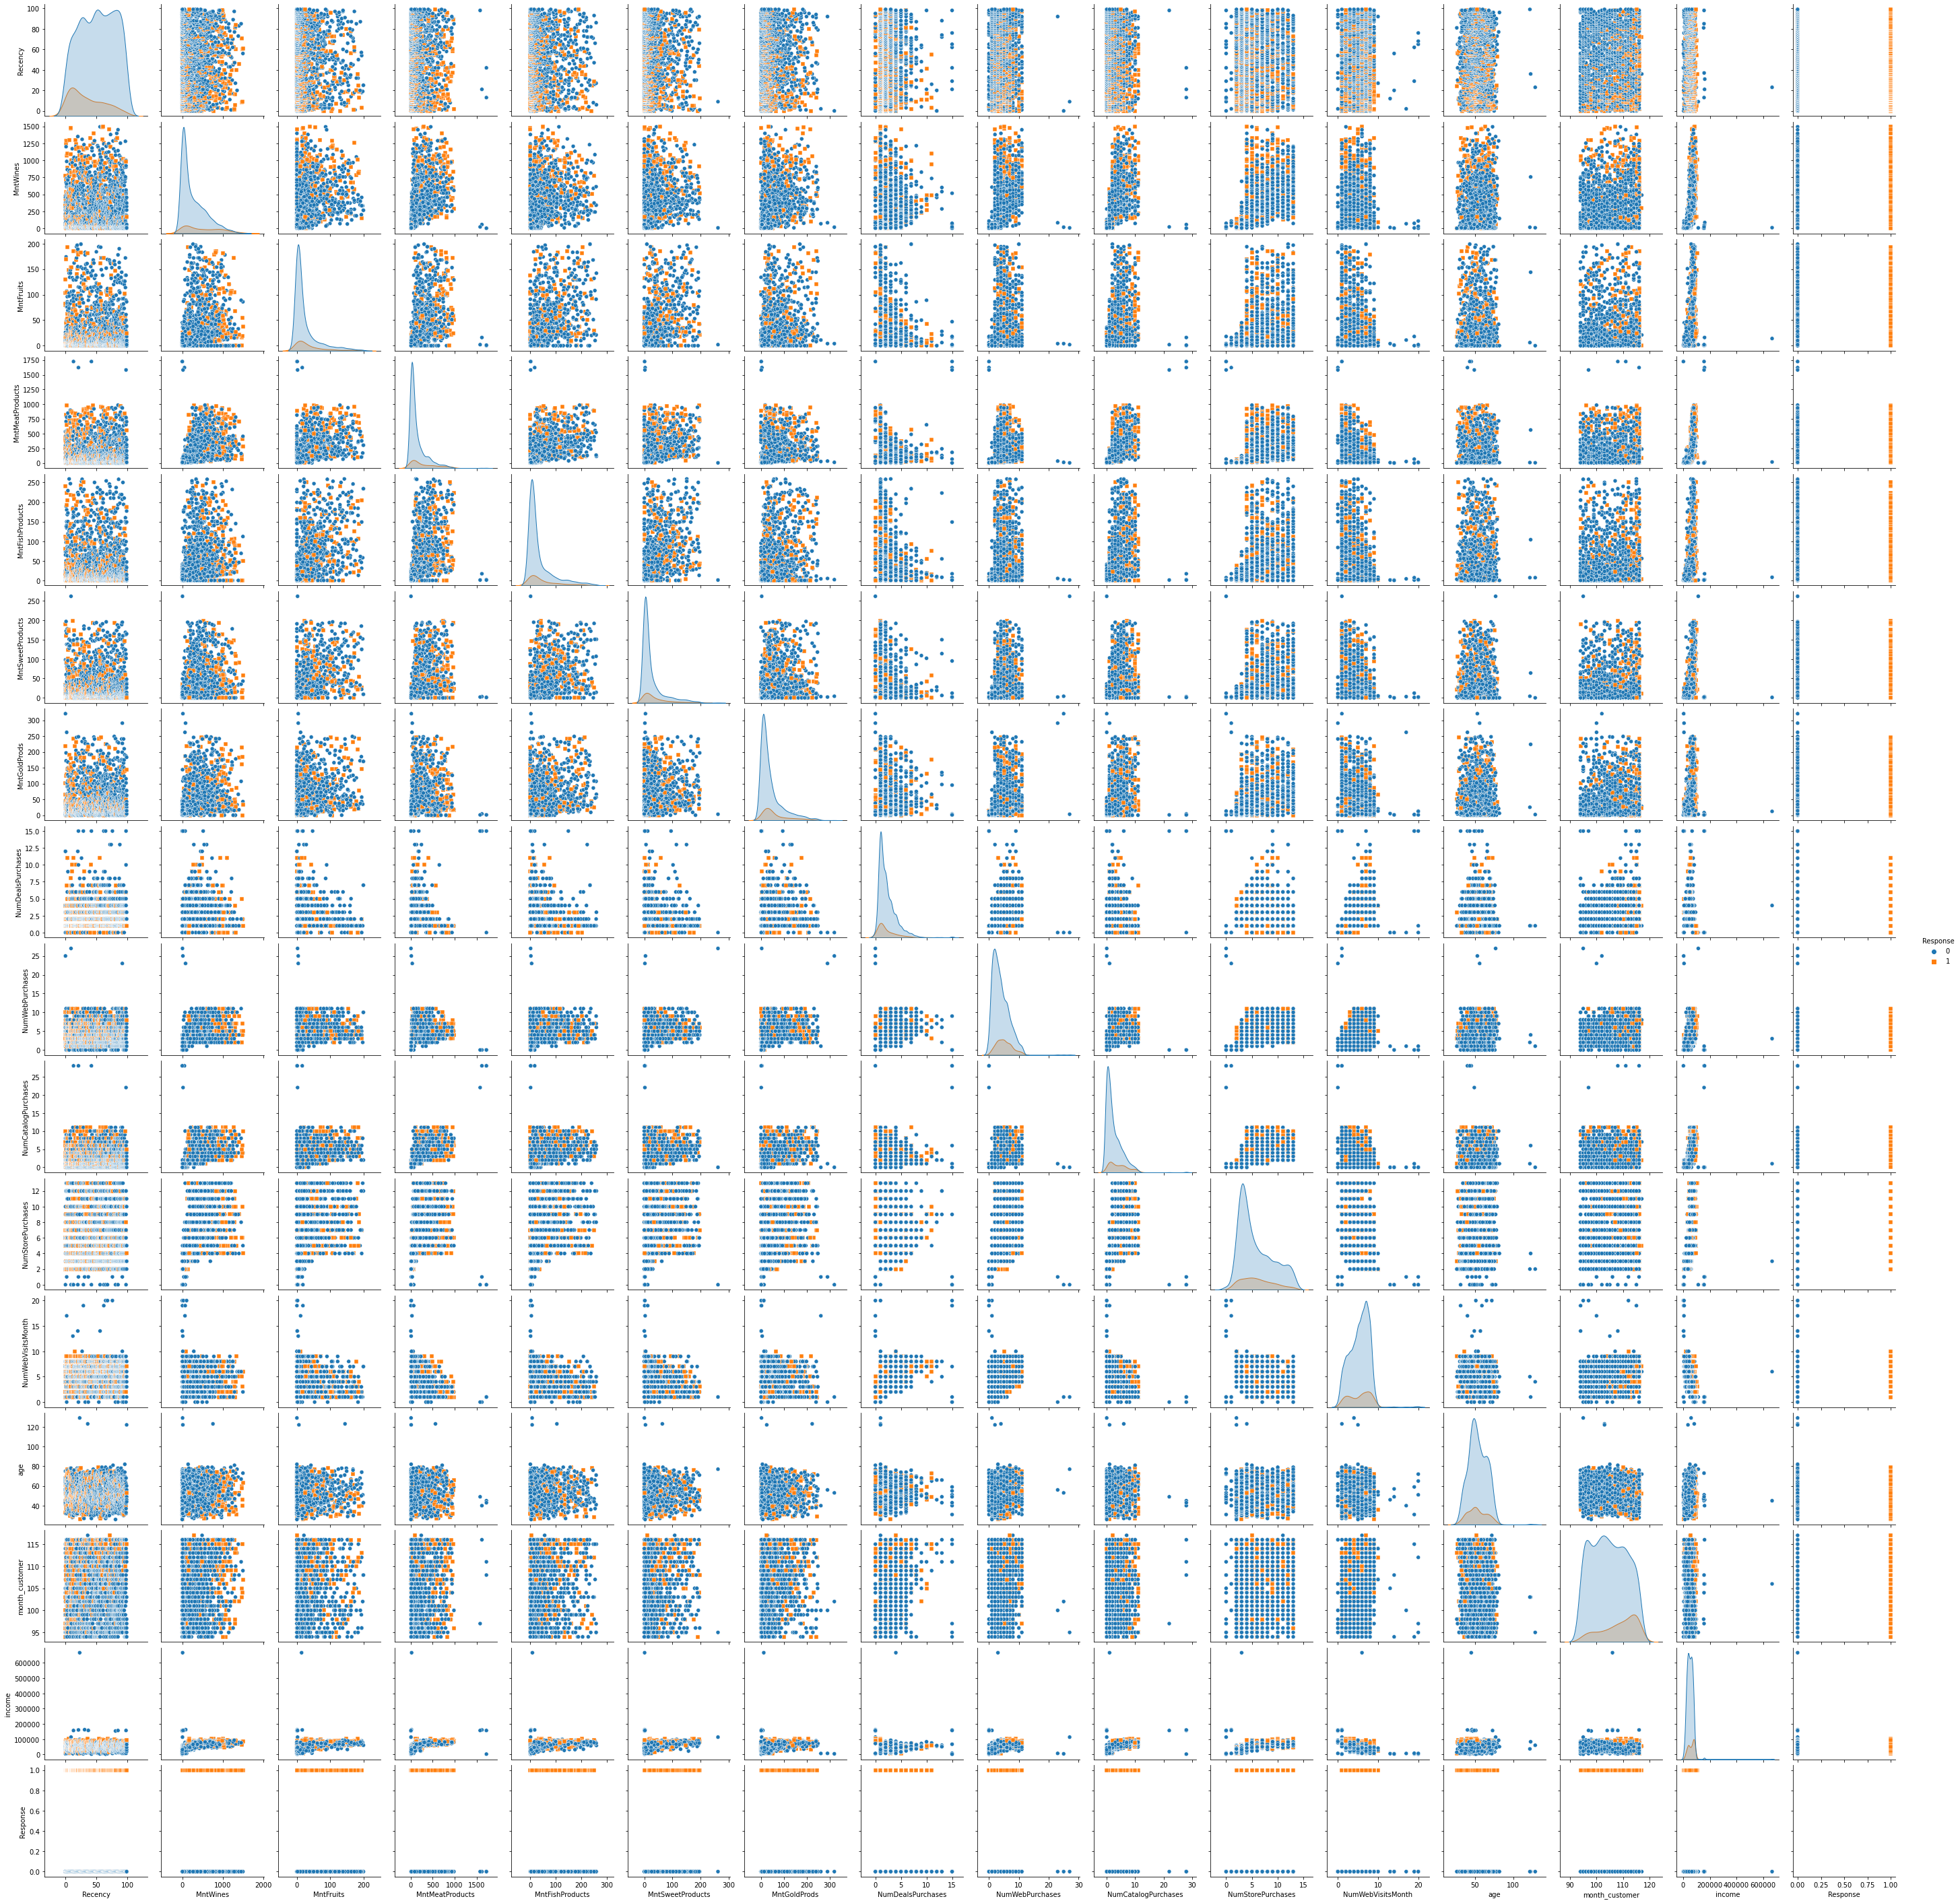

In [7]:
# Observe numerical visual
df_vs.numerical(target='Response')